### 2024-05-14 Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [4]:
hubble = pd.read_csv("hubble.csv", sep = "\t")
hubble.head()

,object,ms,R,v,mt,Mt,D,Rmodern,vModern
0,S.Mag.,..,0.032,170,1.5,-16.0,0.03,0.06170,158.1
1,L.Mag.,..,0.030,290,0.5,-17.2,0.03,0.04997,278.0
2,N.G.C.6822,..,0.214,-130,9.0,-12.7,0.22,0.50000,-57.0
3,598,..,0.263,-70,7.0,-15.1,0.26,0.84000,-179.0
4,221,..,0.275,-185,8.8,-13.4,0.28,0.76300,-200.0


In [5]:
m = smf.ols("Rmodern ~ vModern", data = hubble).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Rmodern   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     99.22
Date:                Tue, 14 May 2024   Prob (F-statistic):           1.30e-09
Time:                        14:00:08   Log-Likelihood:                -57.145
No. Observations:                  24   AIC:                             118.3
Df Residuals:                      22   BIC:                             120.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8618      0.799      2.330      0.029       0.205       3.519
vModern        0.0127      0.001      9.961      0.000       0.010       0.015
==============================================================================
Omnibus:                        3.226   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                1.594
Skew:                           0.414   Prob(JB):                        0.451
Kurtosis:                       3.953   Cond. No.                         899.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
m.predict()

array([ 3.86595578,  5.38588595,  1.13920865, -0.40734248, -0.6735521 ,
       -1.95389362,  4.91684995,  5.76618541,  7.73360128,  4.44781395,
        5.55068238,  1.43203924, 10.68472509,  7.05920357,  8.30151514,
       16.27512714,  7.99727557, 12.20592293,  7.54091622, 14.47504303,
       11.10305449, 14.51053765, 18.13859449, 15.90750433])

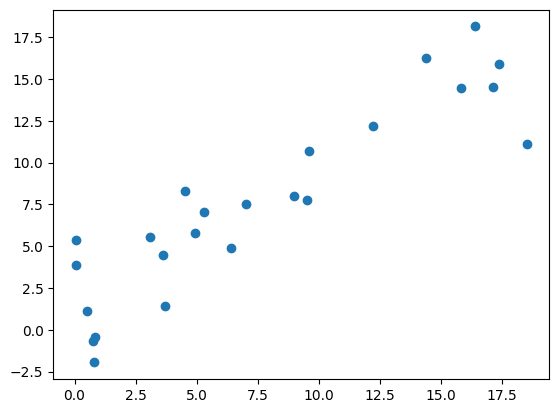

In [7]:
_ = plt.scatter(hubble.Rmodern, m.predict())

In [8]:
rmse = np.sqrt(np.mean((hubble.Rmodern - m.predict())**2))
rmse

2.6172199835618764

In [9]:
newx = {"vModern" : [1000, 2000, 10000]}
m.predict(newx)

0     14.538426
1     27.215075
2    128.628264
dtype: float64

In [11]:
treatment = pd.read_csv("treatment.csv.bz2", sep = "\t")
treatment.head()

,treat,age,educ,ethn,married,re74,re75,re78,u74,u75
0,True,37,11,black,True,0.0,0.0,9930.05,True,True
1,True,30,12,black,False,0.0,0.0,24909.50,True,True
2,True,27,11,black,False,0.0,0.0,7506.15,True,True
3,True,33,8,black,False,0.0,0.0,289.79,True,True
4,True,22,9,black,False,0.0,0.0,4056.49,True,True


In [12]:
treatment["T"] = treatment.treat + 0 
m = smf.logit("T ~ age", data = treatment).fit()
m.summary()

Optimization terminated successfully.
         Current function value: 0.221883
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      T   No. Observations:                 2675
Model:                          Logit   Df Residuals:                     2673
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 May 2024   Pseudo R-squ.:                  0.1176
Time:                        14:10:46   Log-Likelihood:                -593.54
converged:                       True   LL-Null:                       -672.65
Covariance Type:            nonrobust   LLR p-value:                 2.760e-36
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0343      0.330      3.135      0.002       0.388       1.681
age           -0.1229      0.012    -10.052      0.000      -0.147      -0.099
==============================================================================
"""

In [14]:
phat = m.predict()
phat[:10]

array([0.02890026, 0.06574364, 0.0923592 , 0.04640586, 0.15836342,
       0.14265671, 0.05215995, 0.15836342, 0.21389061, 0.17544557])

In [15]:
(phat[:10] > 0.5) + 0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Exercise:
Predict participation probablility and participation for:
- a 20 year old
- a 50 year old
- a 5 year old

In [16]:
newx = {"age": [5, 20, 50]}
m.predict(newx)

0    0.603376
1    0.193946
2    0.005983
dtype: float64

In [18]:
phat = m.predict(newx)
yhat = phat > .5
yhat

0     True
1    False
2    False
dtype: bool

In [19]:
yhat = m.predict() > 0.5
np.mean(yhat == treatment.treat)

0.930841121495327

In [22]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()

In [26]:
y = hubble.Rmodern.values
X = hubble.vModern.values
print(type(X))
X.shape

<class 'numpy.ndarray'>


(24,)

In [31]:
_ = m.fit(X, y)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [27]:
y = hubble.Rmodern.values
X = hubble[["vModern"]].values
print(type(X))
X.shape

<class 'numpy.ndarray'>


(24, 1)

In [28]:
_ = m.fit(X, y)

In [29]:
m.intercept_, m.coef_

(1.861777625515268, array([0.01267665]))

In [30]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()

In [44]:
y = treatment.treat.values
X = treatment[["age"]].values
_ = m.fit(X, y)
m.coef_, m.intercept_

(array([[-0.12292274]]), array([1.03376644]))

In [34]:
newX = np.array([[5], [20], [50]])
m.predict(newX)

array([ True, False, False])

In [35]:
m.predict_proba(newX)

array([[0.39671952, 0.60328048],
       [0.80607237, 0.19392763],
       [0.99401426, 0.00598574]])

In [36]:
m.classes_

array([False,  True])

In [37]:
m.predict_proba(newX)[:,1]

array([0.60328048, 0.19392763, 0.00598574])

In [38]:
np.random.seed(6)
X1 = treatment[["age", "ethn"]].sample(10)
X1

,age,ethn
1019,21,other
2003,52,other
544,25,black
973,22,other
1626,28,other
728,23,black
1498,31,other
1098,29,other
1801,28,other
2277,41,other


In [42]:
pd.get_dummies(treatment[["age", "ethn"]])

,age,ethn_black,ethn_hispanic,ethn_other
0,37,True,False,False
1,30,True,False,False
2,27,True,False,False
3,33,True,False,False
4,22,True,False,False
...,...,...,...,...
2670,47,False,False,True
2671,32,False,False,True
2672,47,False,False,True
2673,54,False,True,False


In [40]:
np.random.seed(6)
X1 = pd.get_dummies(treatment[["age", "ethn"]], drop_first= True)
X1.head()

,age,ethn_hispanic,ethn_other
0,37,False,False
1,30,False,False
2,27,False,False
3,33,False,False
4,22,False,False


In [41]:
_ = m.fit(X1, y)
yhat = m.predict(X1)
np.mean(yhat == y)

0.930841121495327